In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import io

with io.open('Arrhythmia_MLR/attributes.names', mode='r', encoding='utf-8') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines]
attributes=[]
for attr in lines:
    indexs=[int(s) for s in attr.split() if s.isdigit()]
    if(len(indexs)==1):
        words=attr.split(" ")
        attributes.append(words[1])
    elif(len(indexs)==2):
       words=attr.split(" ")
       for i in range(1+indexs[1]-indexs[0]):
           attributes.append(words[3]+"_"+str(i))
     


data_info_root="Arrhythmia_MLR/data_info/"

In [3]:

data = pd.read_csv('Arrhythmia_MLR/arrhythmia.data', header=None, delimiter=',', names=attributes)

In [4]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


SPRAWDZAMY CZY SĄ GDZIE PUSTE LUKI W DANYCH

In [5]:
data_null_sum=data.isnull().sum()
data_null_sum.to_csv(data_info_root+"data_null_sum.csv")
data_null_sum=data_null_sum.sum()
data_null_sum
#jak widac nigdzie nie brakuje danych w postaci pustej komórki

0

In [6]:
missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'


[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['J',
  array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
          83,  84,  87,  90,  91,  92,  94,  95,  96,  97,  98, 100, 101,
         102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116,
         117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
         146, 147, 148, 149, 150,

Sprawdzenie w jakim procencie danych brakuje wartosci

In [7]:
for misval in missing_values:
    print(misval[0],"długość",len(misval[1]),"procent wartosci:",len(misval[1])/len(data))

T długość 8 procent wartosci: 0.017699115044247787
P długość 22 procent wartosci: 0.048672566371681415
QRST długość 1 procent wartosci: 0.0022123893805309734
J długość 376 procent wartosci: 0.831858407079646
Heart_rate długość 1 procent wartosci: 0.0022123893805309734


Usuniesie kolumny J i sprawdzenie drugi raz brakujacych wartosci

In [8]:
#usuwamy wartosc J gdyz brakuje w niej ponad 83 procent danych
data=data.drop(columns='J',axis=1)



In [9]:


missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'

[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['Heart_rate', array([4])]]

Sprawdzamy jakie klasy chorob dla jakiej cechy powinny być obliczane

In [10]:
sicknes_data=[]
sicknes_types=[]
for misval in missing_values:
    for col in misval[1]:
        sicknes_data.append([misval[0],data["sicknes"][col],col])
        sicknes_types.append(data["sicknes"][col])
set(sicknes_types)

{1, 2, 3, 4, 6, 7, 10, 15, 16}

Wypisujemy te cechy i ich klasy chorob dla których dane wpisujemy z srednich oraz te które wpisujemy recznie

In [11]:
mean_data=[]
manual_data=[]
for dt in sicknes_data:
    if(dt[1]!=3 and dt[1]!=4 and dt[1]!=7 and dt[1]!=15):
        mean_data.append(dt)
    else:
        manual_data.append(dt)

In [12]:
print(manual_data)

[['T', 4, 91], ['P', 15, 174], ['P', 3, 204], ['P', 15, 217], ['P', 15, 243], ['P', 3, 253], ['P', 15, 300], ['P', 15, 420], ['Heart_rate', 7, 4]]


In [13]:
mean_data

[['T', 2, 66],
 ['T', 2, 200],
 ['T', 2, 212],
 ['T', 1, 238],
 ['T', 2, 360],
 ['T', 2, 372],
 ['T', 16, 412],
 ['P', 16, 54],
 ['P', 1, 59],
 ['P', 6, 106],
 ['P', 2, 108],
 ['P', 16, 116],
 ['P', 1, 133],
 ['P', 1, 177],
 ['P', 2, 193],
 ['P', 16, 219],
 ['P', 1, 279],
 ['P', 10, 284],
 ['P', 10, 298],
 ['P', 2, 308],
 ['P', 1, 310],
 ['P', 1, 350],
 ['QRST', 1, 241]]

In [14]:

def get_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return np.mean(np.array(arr_mean).astype(float))


In [15]:
for mdata in mean_data:
    data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])

/tmp/ipykernel_74676/3856677013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])


In [16]:
def get_arr_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return arr_mean


In [17]:
for mdata in manual_data:
    print(mdata[0],mdata[1],get_arr_mean(data,mdata[0],mdata[1]))

T 4 ['46', '60', '87', '15', '-8', '38', '104', '-75', '114', '-49', '137', '66', '-42', '51']
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
Heart_rate 7 ['86', '63']


Dla klasy choroby 7 czyli Ventricular Premature Contraction (PVC) heart_rate waha sie od 60-100 wiec umieszczam wartosc (86+63)/2 zostanie wpisana 

48.8613344205605


/tmp/ipykernel_74676/4154352118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])
/tmp/ipykernel_74676/4154352118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P"][204]=get_mean(data,manual_data[2][0],manual_data[2][1])
/tmp/ipykernel_74676/4154352118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P"][253]=get_mean(data,manual_data[2][0],manual_da

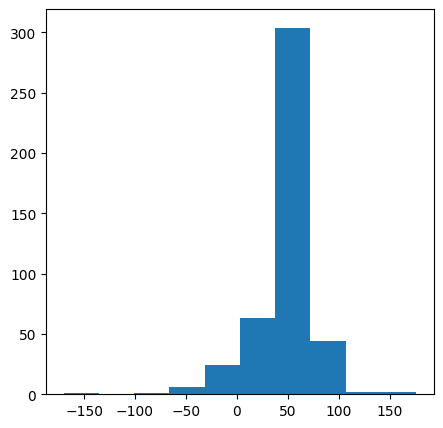

In [18]:
data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])
data["P"][204]=get_mean(data,manual_data[2][0],manual_data[2][1])
data["P"][253]=get_mean(data,manual_data[2][0],manual_data[2][1])
data["Heart_rate"][4]=(86+63)/2
data
P_data=data["P"].copy()
P_data=P_data.drop([174,217,243,300,420])

P_avg=np.mean(P_data.astype(float))
print(P_avg)
fig,axs=plt.subplots(1,1,figsize=[5,5])
axs.hist(P_data.astype(float))
for i in [174,217,243,300,420]:
    data["P"][i]=P_avg


Sprawdzenie z zmodyfikowanie formatu danych

In [19]:
print(data.dtypes)
pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types.csv")

Age               int64
Sex               int64
Height            int64
Weight            int64
QRS_duration      int64
                 ...   
V6_2_6          float64
V6_2_7          float64
V6_2_8          float64
V6_2_9          float64
sicknes           int64
Length: 279, dtype: object


In [20]:
for column in data.columns:
    if(data[column].dtype==object):
        data[column]=data[column].astype(float)
print(data.dtypes)


pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types_changed.csv")

Age               int64
Sex               int64
Height            int64
Weight            int64
QRS_duration      int64
                 ...   
V6_2_6          float64
V6_2_7          float64
V6_2_8          float64
V6_2_9          float64
sicknes           int64
Length: 279, dtype: object


ANALIZA DANYCH

In [21]:
def create_histograms(n_vertical,n_horizontal,fig_size,dataset,titles,xlabel,ylabel,n_bins,labels):
    fig,axs=fig,axs=plt.subplots(n_vertical,n_horizontal,figsize=fig_size)
    i=0
    if n_vertical==1 and n_horizontal==1:
        axs.hist(dataset,n_bins,label=labels)
        axs.set_title(titles)
        axs.set_xlabel(xlabel)
        axs.set_ylabel(ylabel)  
        
    else:
        for axr in axs:
            if n_horizontal==1 or n_vertical==1:
                axr.hist(dataset[i],n_bins[i],label=labels)
                axr.set_title(titles[i])
                axr.set_xlabel(xlabel[i])
                axr.set_ylabel(ylabel[i])
                i+=1
            else:
                for ax in axr:
                    if(i !=len(dataset)):
                        ax.hist(dataset[i],n_bins[i])
                        ax.set_title(titles[i])
                        ax.set_xlabel(xlabel[i])
                        ax.set_ylabel(ylabel[i])
                        i+=1

In [22]:

data["sicknes"].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: sicknes, dtype: int64

Wzrost

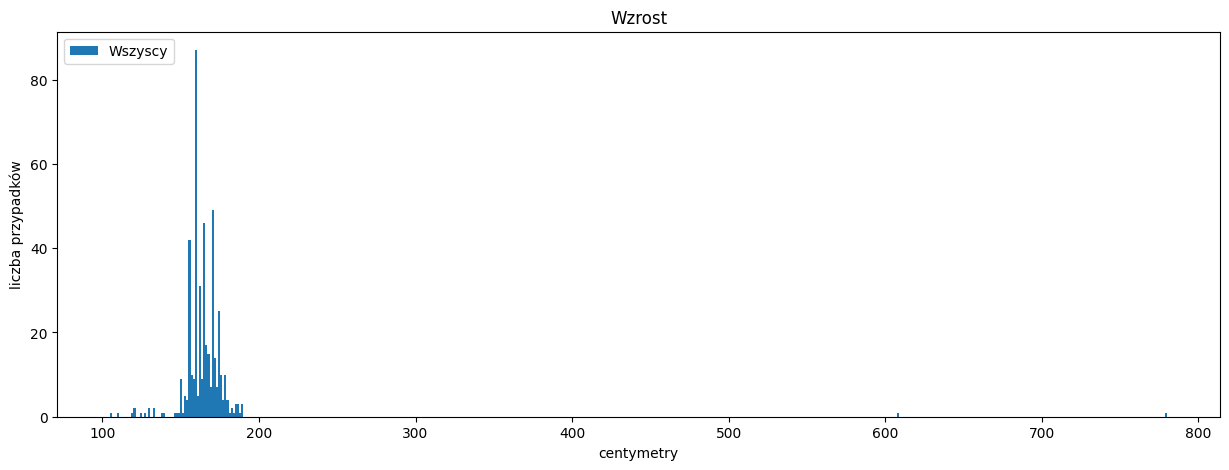

In [23]:
label="Height"
title="Wzrost"
xlabel="centymetry"

labels=["Wszyscy"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label]],bins=500,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [24]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )



Dla Całości
maksymalna wartosc 780 minimalna 105 srednia 166.18805309734512 odchylenie 37.17034006678041


In [25]:
data.loc[data["Height"]>200]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5


In [26]:
data.loc[data["Weight"]<30]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
60,1,0,110,10,80,121,287,156,67,126,...,-0.5,5.1,-4.8,0.0,0.0,0.8,0.9,-1.8,5.2,5
126,58,0,186,18,87,166,372,150,96,-1,...,-0.8,6.3,-2.9,0.0,0.0,0.7,1.4,5.7,15.7,1
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
210,11,1,124,25,90,161,349,209,98,80,...,0.0,8.6,-4.6,0.0,0.0,0.6,4.2,3.5,42.1,10
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5
320,3,0,105,12,69,155,240,133,64,93,...,0.0,3.3,0.0,0.0,0.0,1.1,-0.1,5.9,5.4,5
379,8,0,120,28,118,126,303,164,80,120,...,-0.6,12.5,-3.6,0.0,0.0,0.5,2.3,9.2,32.2,10
401,9,0,120,25,95,118,347,156,66,84,...,-1.9,16.5,-1.4,0.0,0.0,0.4,3.0,25.3,49.9,14
403,7,1,127,22,185,204,284,123,72,-172,...,0.0,3.9,-15.0,0.0,0.0,-0.8,3.6,-36.6,-20.1,5
424,7,0,119,21,140,157,438,226,81,-40,...,0.0,10.0,-2.1,0.0,0.0,1.0,5.5,36.7,115.9,9


In [27]:
data=data.drop(126)
data["Height"][141]=90
data["Height"][316]=100

/tmp/ipykernel_74676/819637169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Height"][141]=90
/tmp/ipykernel_74676/819637169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Height"][316]=100


In [28]:
data.loc[data["Weight"]<30]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
60,1,0,110,10,80,121,287,156,67,126,...,-0.5,5.1,-4.8,0.0,0.0,0.8,0.9,-1.8,5.2,5
141,1,1,90,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
210,11,1,124,25,90,161,349,209,98,80,...,0.0,8.6,-4.6,0.0,0.0,0.6,4.2,3.5,42.1,10
316,0,0,100,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5
320,3,0,105,12,69,155,240,133,64,93,...,0.0,3.3,0.0,0.0,0.0,1.1,-0.1,5.9,5.4,5
379,8,0,120,28,118,126,303,164,80,120,...,-0.6,12.5,-3.6,0.0,0.0,0.5,2.3,9.2,32.2,10
401,9,0,120,25,95,118,347,156,66,84,...,-1.9,16.5,-1.4,0.0,0.0,0.4,3.0,25.3,49.9,14
403,7,1,127,22,185,204,284,123,72,-172,...,0.0,3.9,-15.0,0.0,0.0,-0.8,3.6,-36.6,-20.1,5
424,7,0,119,21,140,157,438,226,81,-40,...,0.0,10.0,-2.1,0.0,0.0,1.0,5.5,36.7,115.9,9
429,8,1,130,24,77,125,358,159,70,87,...,0.0,11.3,-2.1,0.0,0.0,0.7,3.6,16.1,49.2,16


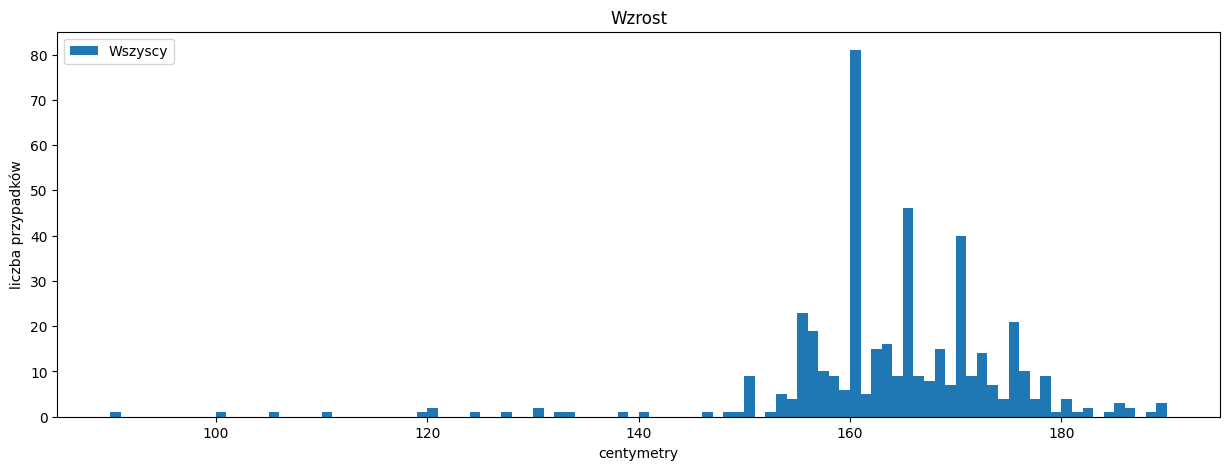

In [29]:
fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label]],bins=100,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   


MODYFIKOWANIE DANYCH DO UCZENIA

In [30]:
#pd.DataFrame(data).to_csv("better_data.csv")

In [31]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Dane kategoryczne

In [32]:
categorical_data=["Sex","Existence_of_diphasic_derivation_of_P_wave","Existence_of_diphasic_derivation_of_R_wave",
                  "Existence_of_diphasic_derivation_of_T_wave","Existence_of_ragged_P_wave",
                  "Existence_of_ragged_R_wave","Existence_of_ragged_T_wave"]

Sprawdzamy jaki zakres i jakie wartosci przyjmują (jesli nie beda to dane typu 1 i 0 to robimy one hot)

In [33]:
for col in categorical_data:
    print(data[col].value_counts())


1    249
0    202
Name: Sex, dtype: int64
0    449
1      2
Name: Existence_of_diphasic_derivation_of_P_wave, dtype: int64
0    446
1      5
Name: Existence_of_diphasic_derivation_of_R_wave, dtype: int64
0    447
1      4
Name: Existence_of_diphasic_derivation_of_T_wave, dtype: int64
0    446
1      5
Name: Existence_of_ragged_P_wave, dtype: int64
0    450
1      1
Name: Existence_of_ragged_R_wave, dtype: int64
0    449
1      2
Name: Existence_of_ragged_T_wave, dtype: int64


 nie trzeba Onehota


Usuwanie kolumn z jedną wartoscią

In [34]:
data=data.reset_index(drop=True)
data

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [35]:
non_value_col=[]
for col in data.columns:
    if(max(data[col])==min(data[col])):
        #print(max(data[col]),min(data[col]),col)
        non_value_col.append(col)
non_value_col

["S'_wave",
 'AVL_4',
 'AVL_6',
 'AVF_8',
 'V4_8',
 'V4_9',
 'V5_4',
 'V5_6',
 'V5_8',
 'V5_10',
 'V6_4',
 'V6_9',
 'V6_10',
 "S'_wave_2",
 'AVL_2_5',
 'V5_2_5',
 'V6_2_5']

In [36]:
data=data.drop(columns=non_value_col,axis=1)

Normalizacja

In [37]:
linear_data=data.columns
linear_data=linear_data.drop(categorical_data)
linear_data =linear_data.drop("sicknes")
linear_data

Index(['Age', 'Height', 'Weight', 'QRS_duration', 'P-R_interval',
       'Q-T_interval', 'T_interval', 'P_interval', 'QRS', 'T',
       ...
       'V5_2_9', 'V6_2_0', 'V6_2_1', 'V6_2_2', 'V6_2_3', 'V6_2_4', 'V6_2_6',
       'V6_2_7', 'V6_2_8', 'V6_2_9'],
      dtype='object', length=254)

In [38]:
for col in linear_data:
    for i in range(451):
        data[col][i]=(data[col][i]-min(data[col]))/(max(data[col]-min(data[col])))


/tmp/ipykernel_74676/1135217753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]=(data[col][i]-min(data[col]))/(max(data[col]-min(data[col])))


In [39]:
pd.DataFrame(data).to_csv("testdanych.csv")

Korelacja danych oraz usuwanie danych nisko zkorelowanych z parametrem "sickess"

<AxesSubplot:>

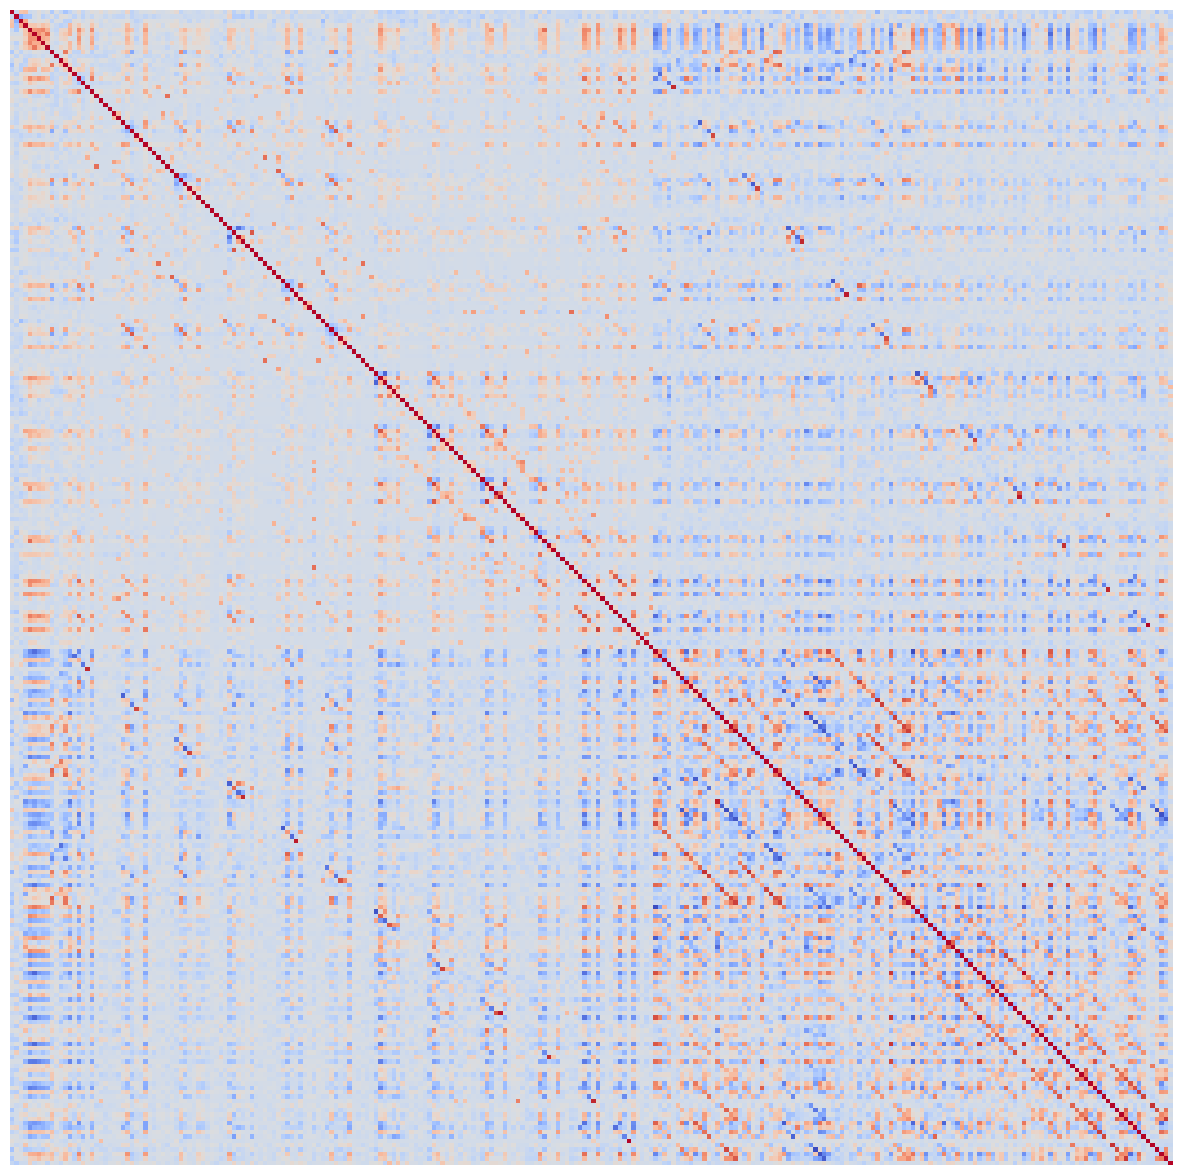

In [40]:

import seaborn as sns

plt.figure(figsize=(15,15))
data_corr=data.corr()
sns.heatmap(data_corr, annot=False, cbar=False, cmap="coolwarm",yticklabels=False,xticklabels=False)

In [41]:
correlation_val=0.05

drop_labels=data_corr["sicknes"].sort_values(ascending=False)[abs(data_corr["sicknes"].sort_values(ascending=False))<=correlation_val]
drop_labels

AVF_2_2     0.048020
V3_7        0.047167
V1_2_3      0.046339
V3_2_1      0.043537
DII_6       0.041583
              ...   
Height     -0.043839
V6_2_0     -0.044197
T_wave_2   -0.046837
V3_2_9     -0.048721
V5_2_1     -0.049832
Name: sicknes, Length: 146, dtype: float64

In [42]:
data=data.drop(columns=drop_labels.index,axis=1)
data

,Age,Sex,QRS_duration,P-R_interval,T_interval,P_interval,P,QRST,S_wave,Existence_of_diphasic_derivation_of_T_wave,...,V4_2_2,V4_2_3,V4_2_6,V4_2_7,V4_2_8,V5_2_2,V5_2_6,V6_2_1,V6_2_6,sicknes
0,0.903614,0,0.270677,0.368321,0.241758,0.590244,0.676301,0.441860,0.500000,0,...,0.417582,0.804196,0.648148,0.558824,0.624452,0.457627,0.486486,1.000000,0.531250,8
1,0.674699,1,0.430030,0.332061,0.390689,0.190244,0.442197,0.551495,0.000000,0,...,0.260989,0.867194,0.574074,0.453782,0.598598,0.372881,0.351351,0.803922,0.312500,6
2,0.650602,0,0.733659,0.311069,0.485238,0.497561,0.693642,0.667774,0.909091,0,...,0.274725,0.849952,0.574074,0.436975,0.533742,0.376271,0.351351,0.803922,0.343750,10
3,0.662651,0,0.531240,0.385496,0.469480,0.697561,0.476879,0.514950,0.227273,0,...,0.412088,0.854521,0.500000,0.483193,0.673094,0.515254,0.405405,0.803922,0.375000,1
4,0.903614,0,0.467318,0.345420,0.464227,0.502439,0.667630,0.458472,0.454545,0,...,0.417582,0.801971,0.462963,0.550420,0.617879,0.308475,0.189189,0.803922,0.218750,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.679487,1,0.740089,1.000000,0.706096,1.000000,0.893805,0.288591,0.600000,0,...,0.122881,0.700671,0.800000,0.680851,0.363960,0.186364,0.421053,0.285714,0.466667,1
447,0.474359,0,0.925740,0.778409,0.921932,0.629310,1.000000,1.000000,0.900000,0,...,0.953390,0.881147,0.700000,1.000000,1.000000,0.963636,0.210526,0.285714,0.266667,10
448,0.461538,0,1.000000,1.000000,0.889786,1.000000,0.000000,0.000000,1.000000,0,...,0.872881,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.285714,1.000000,2
449,0.410256,1,1.000000,0.834646,1.000000,0.807692,0.000000,0.914894,0.000000,0,...,0.504237,0.000000,0.600000,1.000000,0.397727,1.000000,0.400000,0.000000,0.500000,1


<AxesSubplot:>

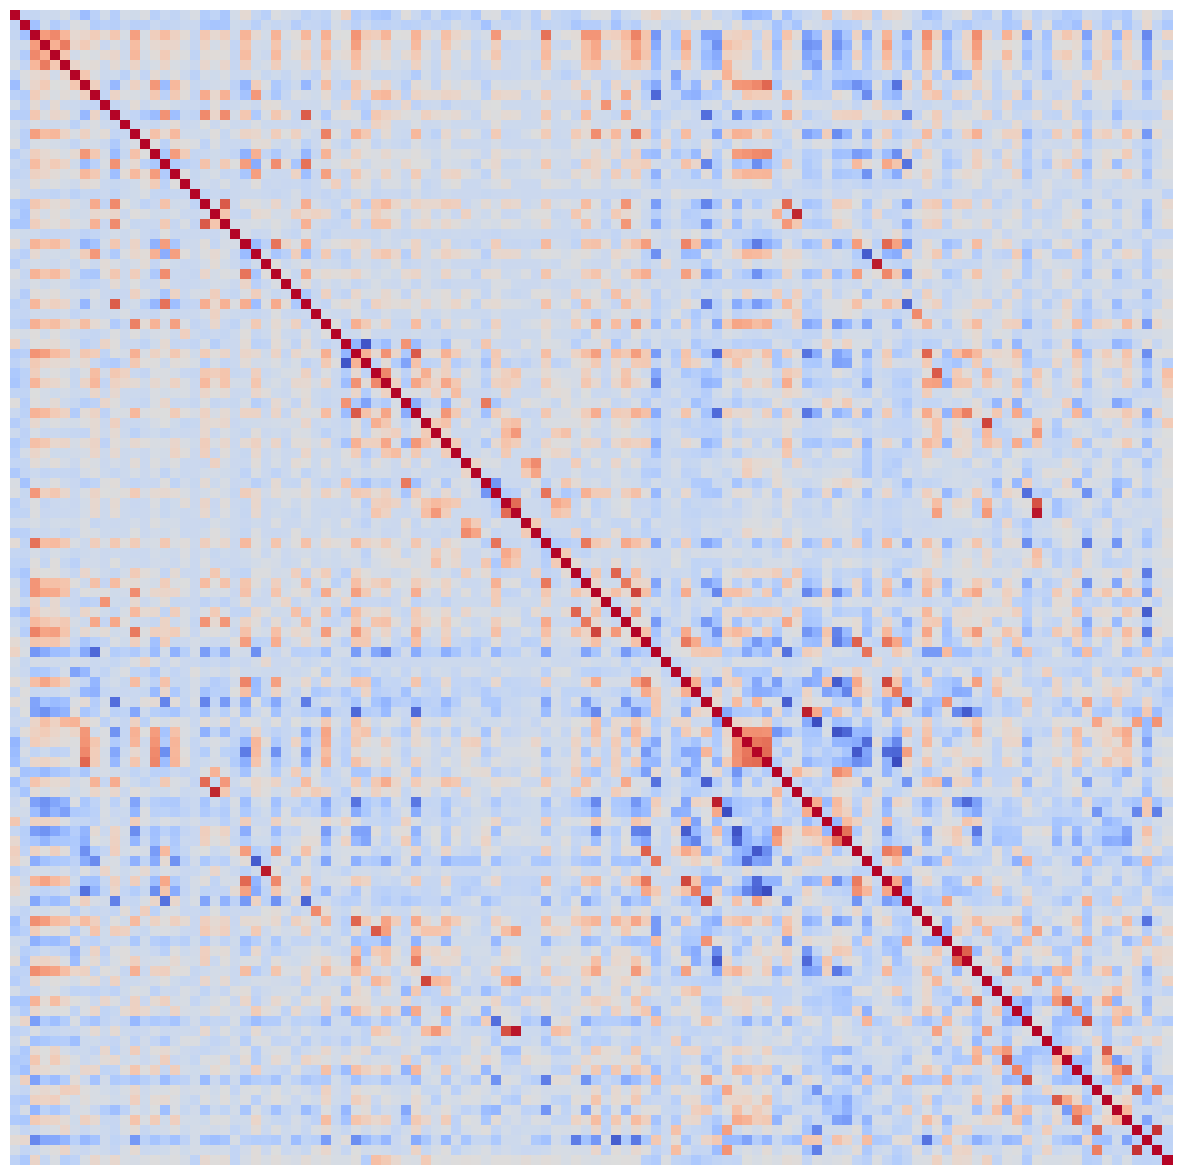

In [43]:
plt.figure(figsize=(15,15))
data_corr=data.corr()
sns.heatmap(data_corr, annot=False, cbar=False, cmap="coolwarm",yticklabels=False,xticklabels=False)

In [44]:
data=data.astype(float)
print(data.dtypes)

Age             float64
Sex             float64
QRS_duration    float64
P-R_interval    float64
T_interval      float64
                 ...   
V5_2_2          float64
V5_2_6          float64
V6_2_1          float64
V6_2_6          float64
sicknes         float64
Length: 116, dtype: object


Sztuczne dodawnia danych


In [45]:
data["sicknes"].value_counts()

1.0     244
10.0     50
2.0      44
6.0      25
16.0     22
3.0      15
4.0      15
5.0      13
9.0       9
15.0      5
14.0      4
7.0       3
8.0       2
Name: sicknes, dtype: int64

In [46]:
data_S1=pd.DataFrame(data.loc[data["sicknes"]==1])
data_S10=pd.DataFrame(data.loc[data["sicknes"]==10])
data_S2=pd.DataFrame(data.loc[data["sicknes"]==2])
data_S6=pd.DataFrame(data.loc[data["sicknes"]==6])
data_S16=pd.DataFrame(data.loc[data["sicknes"]==16])
data_S3=pd.DataFrame(data.loc[data["sicknes"]==3])
data_S4=pd.DataFrame(data.loc[data["sicknes"]==4])
data_S5=pd.DataFrame(data.loc[data["sicknes"]==5])
data_S9=pd.DataFrame(data.loc[data["sicknes"]==9])
data_S15=pd.DataFrame(data.loc[data["sicknes"]==15])
data_S14=pd.DataFrame(data.loc[data["sicknes"]==14])
data_S7=pd.DataFrame(data.loc[data["sicknes"]==7])
data_S8=pd.DataFrame(data.loc[data["sicknes"]==8])

Stworzenie pomoczniczej tablicy do utworzenia zbioru danych z równa iloscią danych oraz z shufflowanym a raczej ustawionum po kolei zbiorem chrobób

Zbiro walidacyjny i testowy bedzie miał rozmiar łącznie 20% całego zbioru danych

Dodanie S1

In [47]:
print(len(data_S1))
print(len(data_S1[:196]))
print(len(data_S1[196:220]))
print(len(data_S1[220:]))
print(len(data_S1[:196])/len(data_S1))
print(len(data_S1[196:220])/len(data_S1))
print(len(data_S1[220:])/len(data_S1))


244
196
24
24
0.8032786885245902
0.09836065573770492
0.09836065573770492


In [48]:
data_train=pd.DataFrame(data_S1[:196])#82
data_test=pd.DataFrame(data_S1[196:220])#81
data_valid=pd.DataFrame(data_S1[220:])#81
data_test_proc=pd.DataFrame(data_S1[196:220])#81
data_valid_proc=pd.DataFrame(data_S1[220:])#81

dodanieS2

In [49]:

print(len(data_S2))
print(len(data_S2[:36])*5)
print(len(data_S2[36:40])*6)
print(len(data_S2[40:])*6)
print(len(data_S2[:36])/len(data_S2))
print(len(data_S2[36:40])/len(data_S2))
print(len(data_S2[40:])/len(data_S2))

#dodajemy to kilka razy aby porcent róznych rodzajóœ chorób był równy (jest to równoważe uczeniu z wagami)



44
180
24
24
0.8181818181818182
0.09090909090909091
0.09090909090909091


In [50]:
data_test_proc=data_test_proc.append(data_S2[36:40], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S2[40:],ignore_index=True)
for i in range(5):
    data_train=data_train.append(data_S2[:36], ignore_index=True)
    data_test=data_test.append(data_S2[36:40], ignore_index=True)
    data_valid=data_valid.append(data_S2[40:],ignore_index=True)
data_test=data_test.append(data_S2[36:40], ignore_index=True)
data_valid=data_valid.append(data_S2[40:],ignore_index=True)

/tmp/ipykernel_74676/3881863190.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S2[36:40], ignore_index=True)
/tmp/ipykernel_74676/3881863190.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S2[40:],ignore_index=True)
/tmp/ipykernel_74676/3881863190.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S2[:36], ignore_index=True)
/tmp/ipykernel_74676/3881863190.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S2[36:40], ignore_index=True)
/tmp/ipykernel_74676/3881863190.py:6: Fut

dodanie S3


In [51]:
print(len(data_S3))
print(len(data_S3[:11])*18)
print(len(data_S3[11:13])*12)
print(len(data_S3[13:])*12)
print(len(data_S3[:11])/len(data_S3))
print(len(data_S3[11:13])/len(data_S3))
print(len(data_S3[13:])/len(data_S3))

15
198
24
24
0.7333333333333333
0.13333333333333333
0.13333333333333333


In [52]:
data_test_proc=data_test_proc.append(data_S3[11:13], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S3[13:],ignore_index=True)

for i in range(18):
    data_train=data_train.append(data_S3[:11], ignore_index=True)
for i in range(12):
    data_test=data_test.append(data_S3[11:13], ignore_index=True)
    data_valid=data_valid.append(data_S3[13:],ignore_index=True)

/tmp/ipykernel_74676/816291973.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S3[11:13], ignore_index=True)
/tmp/ipykernel_74676/816291973.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S3[13:],ignore_index=True)
/tmp/ipykernel_74676/816291973.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S3[:11], ignore_index=True)
/tmp/ipykernel_74676/816291973.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S3[11:13], ignore_index=True)
/tmp/ipykernel_74676/816291973.py:8: FutureWa

dodanie S4


In [53]:

print(len(data_S4))
print(len(data_S4[:11])*18)
print(len(data_S4[11:13])*12)
print(len(data_S4[13:])*12)
print(len(data_S4[:11])/len(data_S4))
print(len(data_S4[11:13])/len(data_S4))
print(len(data_S4[13:])/len(data_S4))

15
198
24
24
0.7333333333333333
0.13333333333333333
0.13333333333333333


In [54]:

data_test_proc=data_test_proc.append(data_S4[11:13], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S4[13:],ignore_index=True)

for i in range(18):
    data_train=data_train.append(data_S4[:11], ignore_index=True)
for i in range(12):
    data_test=data_test.append(data_S4[11:13], ignore_index=True)
    data_valid=data_valid.append(data_S4[13:],ignore_index=True)

/tmp/ipykernel_74676/2870660440.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S4[11:13], ignore_index=True)
/tmp/ipykernel_74676/2870660440.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S4[13:],ignore_index=True)
/tmp/ipykernel_74676/2870660440.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S4[:11], ignore_index=True)
/tmp/ipykernel_74676/2870660440.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S4[11:13], ignore_index=True)
/tmp/ipykernel_74676/2870660440.py:8: Fut

dodanie S5


In [55]:

print(len(data_S5))
print(len(data_S5[:9])*22)
print(len(data_S5[9:11])*12)
print(len(data_S5[11:])*12)
print(len(data_S5[:9])/len(data_S5))
print(len(data_S5[9:11])/len(data_S5))
print(len(data_S5[11:])/len(data_S5))

13
198
24
24
0.6923076923076923
0.15384615384615385
0.15384615384615385


In [56]:
data_test_proc=data_test_proc.append(data_S5[9:11], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S5[11:],ignore_index=True)

for i in range(22):
    data_train=data_train.append(data_S5[:9], ignore_index=True)
for i in range(12):
    data_test=data_test.append(data_S5[9:11], ignore_index=True)
    data_valid=data_valid.append(data_S5[11:],ignore_index=True)

/tmp/ipykernel_74676/137689571.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S5[9:11], ignore_index=True)
/tmp/ipykernel_74676/137689571.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S5[11:],ignore_index=True)
/tmp/ipykernel_74676/137689571.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S5[:9], ignore_index=True)
/tmp/ipykernel_74676/137689571.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S5[9:11], ignore_index=True)
/tmp/ipykernel_74676/137689571.py:8: FutureWarni

dodanie S6

In [57]:
print(len(data_S6))
print(len(data_S6[:19])*10)
print(len(data_S6[19:22])*8)
print(len(data_S6[22:])*8)
print(len(data_S6[:19])/len(data_S6))
print(len(data_S6[19:22])/len(data_S6))
print(len(data_S6[22:])/len(data_S6))

25
190
24
24
0.76
0.12
0.12


In [58]:
data_test_proc=data_test_proc.append(data_S6[19:22], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S6[22:],ignore_index=True)

for i in range(10):
    data_train=data_train.append(data_S6[:19], ignore_index=True)
for i in range(8):
    data_test=data_test.append(data_S6[19:22], ignore_index=True)
    data_valid=data_valid.append(data_S6[22:],ignore_index=True)

/tmp/ipykernel_74676/591124406.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S6[19:22], ignore_index=True)
/tmp/ipykernel_74676/591124406.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S6[22:],ignore_index=True)
/tmp/ipykernel_74676/591124406.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S6[:19], ignore_index=True)
/tmp/ipykernel_74676/591124406.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S6[19:22], ignore_index=True)
/tmp/ipykernel_74676/591124406.py:8: FutureWa

dodanie S7


In [59]:
print(len(data_S7))
print(len(data_S7[:1])*196)
print(len(data_S7[1:2])*24)
print(len(data_S7[2:])*24)
print(len(data_S7[:1])/len(data_S7))
print(len(data_S7[1:2])/len(data_S7))
print(len(data_S7[2:])/len(data_S7))

3
196
24
24
0.3333333333333333
0.3333333333333333
0.3333333333333333


In [60]:
data_test_proc=data_test_proc.append(data_S7[1:2], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S7[2:],ignore_index=True)

for i in range(196):
    data_train=data_train.append(data_S7[:1], ignore_index=True)
for i in range(24):
    data_test=data_test.append(data_S7[1:2], ignore_index=True)
    data_valid=data_valid.append(data_S7[2:],ignore_index=True)

/tmp/ipykernel_74676/131400366.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S7[1:2], ignore_index=True)
/tmp/ipykernel_74676/131400366.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S7[2:],ignore_index=True)
/tmp/ipykernel_74676/131400366.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S7[:1], ignore_index=True)
/tmp/ipykernel_74676/131400366.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S7[1:2], ignore_index=True)
/tmp/ipykernel_74676/131400366.py:8: FutureWarning:

dodanie S8

In [61]:
print(len(data_S8))
print(len(data_S8[:1]))
print(len(data_S8[1:2]))
print(len(data_S8[1:]))
print(len(data_S8[:1])/len(data_S8))
print(len(data_S8[1:2])/len(data_S8))
print(len(data_S8[1:])/len(data_S8))

2
1
1
1
0.5
0.5
0.5


In [62]:
data_test_proc=data_test_proc.append(data_S8[1:2], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S8[1:],ignore_index=True)

for i in range(196):
    data_train=data_train.append(data_S8[:1], ignore_index=True)
for i in range(24):
    data_test=data_test.append(data_S8[1:2], ignore_index=True)
    data_valid=data_valid.append(data_S8[1:],ignore_index=True)

/tmp/ipykernel_74676/3459875076.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S8[1:2], ignore_index=True)
/tmp/ipykernel_74676/3459875076.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S8[1:],ignore_index=True)
/tmp/ipykernel_74676/3459875076.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S8[:1], ignore_index=True)
/tmp/ipykernel_74676/3459875076.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S8[1:2], ignore_index=True)
/tmp/ipykernel_74676/3459875076.py:8: FutureWar

dodanie S9


In [63]:
print(len(data_S9))
print(len(data_S9[:5])*39)
print(len(data_S9[5:7])*12)
print(len(data_S9[7:])*12)
print(len(data_S9[:5])/len(data_S9))
print(len(data_S9[5:7])/len(data_S9))
print(len(data_S9[7:])/len(data_S9))

9
195
24
24
0.5555555555555556
0.2222222222222222
0.2222222222222222


In [64]:
data_test_proc=data_test_proc.append(data_S9[5:7], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S9[7:],ignore_index=True)

for i in range(39):
    data_train=data_train.append(data_S9[:5], ignore_index=True)
for i in range(12):
    data_test=data_test.append(data_S9[5:7], ignore_index=True)
    data_valid=data_valid.append(data_S9[7:],ignore_index=True)

/tmp/ipykernel_74676/670596245.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S9[5:7], ignore_index=True)
/tmp/ipykernel_74676/670596245.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S9[7:],ignore_index=True)
/tmp/ipykernel_74676/670596245.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S9[:5], ignore_index=True)
/tmp/ipykernel_74676/670596245.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S9[5:7], ignore_index=True)
/tmp/ipykernel_74676/670596245.py:8: FutureWarning:

dodanie S10


In [65]:
print(len(data_S10))
print(len(data_S10[:40])*5)
print(len(data_S10[40:45])*5)
print(len(data_S10[45:])*5)
print(len(data_S10[:40])/len(data_S10))
print(len(data_S10[40:45])/len(data_S10))
print(len(data_S10[45:])/len(data_S10))

50
200
25
25
0.8
0.1
0.1


In [66]:
data_test_proc=data_test_proc.append(data_S10[40:45], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S10[45:],ignore_index=True)

for i in range(5):
    data_train=data_train.append(data_S10[:40], ignore_index=True)
for i in range(5):
    data_test=data_test.append(data_S10[40:45], ignore_index=True)
    data_valid=data_valid.append(data_S10[45:],ignore_index=True)

/tmp/ipykernel_74676/2313025126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S10[40:45], ignore_index=True)
/tmp/ipykernel_74676/2313025126.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S10[45:],ignore_index=True)
/tmp/ipykernel_74676/2313025126.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S10[:40], ignore_index=True)
/tmp/ipykernel_74676/2313025126.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S10[40:45], ignore_index=True)
/tmp/ipykernel_74676/2313025126.py:8:

dodanie S14


In [67]:
print(len(data_S14))
print(len(data_S14[:2])*98)
print(len(data_S14[2:3])*24)
print(len(data_S14[3:])*24)
print(len(data_S14[:2])/len(data_S14))
print(len(data_S14[2:3])/len(data_S14))
print(len(data_S14[3:])/len(data_S14))

4
196
24
24
0.5
0.25
0.25


In [68]:
data_test_proc=data_test_proc.append(data_S14[2:3], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S14[3:],ignore_index=True)

for i in range(98):
    data_train=data_train.append(data_S14[:2], ignore_index=True)
for i in range(24):
    data_test=data_test.append(data_S14[2:3], ignore_index=True)
    data_valid=data_valid.append(data_S14[3:],ignore_index=True)

/tmp/ipykernel_74676/142680281.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S14[2:3], ignore_index=True)
/tmp/ipykernel_74676/142680281.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S14[3:],ignore_index=True)
/tmp/ipykernel_74676/142680281.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S14[:2], ignore_index=True)
/tmp/ipykernel_74676/142680281.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S14[2:3], ignore_index=True)
/tmp/ipykernel_74676/142680281.py:8: FutureWarn

dodanie S15

In [69]:
print(len(data_S15))
print(len(data_S15[:3])*66)
print(len(data_S15[3:4])*24)
print(len(data_S15[4:])*24)
print(len(data_S15[:3])/len(data_S15))
print(len(data_S15[3:4])/len(data_S15))
print(len(data_S15[4:])/len(data_S15))

5
198
24
24
0.6
0.2
0.2


In [70]:
data_test_proc=data_test_proc.append(data_S15[3:4], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S15[4:],ignore_index=True)

for i in range(66):
    data_train=data_train.append(data_S15[:3], ignore_index=True)
for i in range(24):
    data_test=data_test.append(data_S15[3:4], ignore_index=True)
    data_valid=data_valid.append(data_S15[4:],ignore_index=True)

/tmp/ipykernel_74676/3395298573.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S15[3:4], ignore_index=True)
/tmp/ipykernel_74676/3395298573.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S15[4:],ignore_index=True)
/tmp/ipykernel_74676/3395298573.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S15[:3], ignore_index=True)
/tmp/ipykernel_74676/3395298573.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S15[3:4], ignore_index=True)
/tmp/ipykernel_74676/3395298573.py:8: Futur

dodanie S16

In [71]:
print(len(data_S16))
print(len(data_S16[:18])*11)
print(len(data_S16[18:20])*12)
print(len(data_S16[20:])*12)
print(len(data_S16[:18])/len(data_S16))
print(len(data_S16[18:20])/len(data_S16))
print(len(data_S16[20:])/len(data_S16))

22
198
24
24
0.8181818181818182
0.09090909090909091
0.09090909090909091


In [72]:
data_test_proc=data_test_proc.append(data_S16[18:20], ignore_index=True)
data_valid_proc=data_valid_proc.append(data_S16[20:],ignore_index=True)
for i in range(11):
    data_train=data_train.append(data_S16[:18], ignore_index=True)
for i in range(12):
    data_test=data_test.append(data_S16[18:20], ignore_index=True)
    data_valid=data_valid.append(data_S16[20:],ignore_index=True)

/tmp/ipykernel_74676/2158379733.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test_proc=data_test_proc.append(data_S16[18:20], ignore_index=True)
/tmp/ipykernel_74676/2158379733.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_valid_proc=data_valid_proc.append(data_S16[20:],ignore_index=True)
/tmp/ipykernel_74676/2158379733.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train=data_train.append(data_S16[:18], ignore_index=True)
/tmp/ipykernel_74676/2158379733.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test=data_test.append(data_S16[18:20], ignore_index=True)
/tmp/ipykernel_74676/2158379733.py:7:

Dane zostały uporządkowane procetowo(najlepiej jak sie dało) do odpowiednich zbiorów danych oraz zostały dokopiowane (zmultiplikowane dane do zbirów danych) 
w celu wyeliminowania róznicy w uczeniu sieci (w przypadku danych validacyjnych i testowych zostana utworzone po dwa zbiory jeden z wyrównanymi danymi drugi z danymi procentowo rozłozonymi ). niestety robienie zbioru testowego rozdzielajac na procenty na tak nie zrównowarznym zbiorze powoduje ze procent predykcji jest zakłamany  dlatego bedzie też obliczana precyzja dla danej kategori choroby

In [73]:

print(data_train["sicknes"].value_counts())

10.0    200
3.0     198
4.0     198
5.0     198
15.0    198
16.0    198
1.0     196
7.0     196
8.0     196
14.0    196
9.0     195
6.0     190
2.0     180
Name: sicknes, dtype: int64


In [74]:
data_train

,Age,Sex,QRS_duration,P-R_interval,T_interval,P_interval,P,QRST,S_wave,Existence_of_diphasic_derivation_of_T_wave,...,V4_2_2,V4_2_3,V4_2_6,V4_2_7,V4_2_8,V5_2_2,V5_2_6,V6_2_1,V6_2_6,sicknes
0,0.662651,0.0,0.531240,0.385496,0.469480,0.697561,0.476879,0.514950,0.227273,0.0,...,0.412088,0.854521,0.500000,0.483193,0.673094,0.515254,0.405405,0.803922,0.375000,1.0
1,0.481928,1.0,0.408723,0.246183,0.348668,0.375610,0.708092,0.664452,0.000000,0.0,...,0.211538,0.833958,0.555556,0.424370,0.553024,0.250847,0.351351,0.803922,0.375000,1.0
2,0.590361,1.0,0.414050,0.000000,0.411700,0.341463,0.514451,0.617940,0.409091,0.0,...,0.181319,0.886509,0.537037,0.403361,0.567485,0.288136,0.270270,0.803922,0.281250,1.0
3,0.530120,0.0,0.446011,0.225191,0.419579,0.307317,0.716763,0.667774,0.000000,0.0,...,0.217033,0.813036,0.648148,0.617647,0.571867,0.315254,0.459459,0.803922,0.437500,1.0
4,0.542169,1.0,0.408723,0.272901,0.393316,0.317073,0.632948,0.534884,0.318182,0.0,...,0.104396,0.851468,0.574074,0.357143,0.508326,0.162712,0.405405,0.803922,0.406250,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.518519,0.0,0.600489,0.406489,0.672541,0.521951,0.657993,0.646341,0.600000,0.0,...,0.718412,0.676785,0.625000,0.797619,0.751031,0.579661,0.607143,0.666667,0.782609,16.0
2535,0.666667,0.0,0.509933,0.293893,0.519522,0.556098,0.724907,0.658537,0.600000,0.0,...,0.483755,0.780293,0.541667,0.714286,0.733505,0.528814,0.500000,0.777778,0.608696,16.0
2536,0.576923,0.0,0.557874,0.377863,0.666420,0.560976,0.572491,0.914634,0.550000,0.0,...,0.018051,0.384838,0.791667,0.738095,0.256701,0.000000,0.750000,0.000000,0.913043,16.0
2537,0.602564,1.0,0.446011,0.240458,0.418530,0.351220,0.475836,0.394309,0.000000,0.0,...,0.101083,0.745790,0.583333,0.529762,0.545361,0.176271,0.535714,0.777778,0.565217,16.0


In [75]:
data_train=data_train.iloc[np.random.permutation(len(data_train))].reset_index(drop=True)

data_train

,Age,Sex,QRS_duration,P-R_interval,T_interval,P_interval,P,QRST,S_wave,Existence_of_diphasic_derivation_of_T_wave,...,V4_2_2,V4_2_3,V4_2_6,V4_2_7,V4_2_8,V5_2_2,V5_2_6,V6_2_1,V6_2_6,sicknes
0,0.903614,0.0,0.270677,0.368321,0.241758,0.590244,0.676301,0.441860,0.500000,0.0,...,0.417582,0.804196,0.648148,0.558824,0.624452,0.457627,0.486486,1.000000,0.531250,8.0
1,0.650602,1.0,0.376762,0.282443,0.424651,0.453659,0.459538,0.333333,0.000000,0.0,...,0.235690,0.841336,0.425000,0.505952,0.653608,0.230508,0.324324,0.803922,0.343750,6.0
2,0.590361,1.0,0.472645,0.320611,0.498100,0.492683,0.670520,0.292683,0.450000,0.0,...,0.407534,0.851952,0.629630,0.642857,0.741237,0.284746,0.607143,0.686275,0.739130,4.0
3,0.666667,0.0,0.509933,0.293893,0.519522,0.556098,0.724907,0.658537,0.600000,0.0,...,0.483755,0.780293,0.541667,0.714286,0.733505,0.528814,0.500000,0.777778,0.608696,16.0
4,0.543210,1.0,0.467318,0.278626,0.482798,0.380488,0.520446,0.410569,0.550000,0.0,...,0.231047,0.700671,0.583333,0.672619,0.577835,0.240678,0.500000,0.777778,0.565217,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0.409639,0.0,0.499279,0.354962,0.587665,0.609756,0.664740,0.704319,0.409091,0.0,...,0.510989,0.848271,0.666667,0.655462,0.744961,0.728814,0.513514,0.803922,0.437500,14.0
2535,0.481928,0.0,0.504606,0.311069,0.430772,0.453659,0.635838,0.475610,0.000000,0.0,...,0.416667,0.639628,0.629630,0.666667,0.655155,0.247458,0.405405,0.627451,0.437500,4.0
2536,0.802469,0.0,0.451338,0.307252,0.449134,0.697561,0.531599,0.280488,0.450000,0.0,...,0.335616,0.753752,0.592593,0.553571,0.629381,0.416949,0.464286,0.666667,0.434783,3.0
2537,0.409639,0.0,0.467318,0.303435,0.510341,0.448780,0.664740,0.694352,0.545455,0.0,...,0.736264,0.813996,0.574074,0.529412,0.686678,0.538983,0.378378,0.509804,0.375000,10.0


In [76]:
print(data_test["sicknes"].value_counts())

10.0    25
1.0     24
2.0     24
3.0     24
4.0     24
5.0     24
6.0     24
7.0     24
8.0     24
9.0     24
14.0    24
15.0    24
16.0    24
Name: sicknes, dtype: int64


In [77]:
print(data_test_proc["sicknes"].value_counts())

1.0     24
10.0     5
2.0      4
6.0      3
3.0      2
4.0      2
5.0      2
9.0      2
16.0     2
7.0      1
8.0      1
14.0     1
15.0     1
Name: sicknes, dtype: int64


Zamieniam numery chorób w taki soposób aby numery indexów na wyjsciu sieci się zgadzały
14->11
15->12
16->13

In [78]:
def transform(data):
    for i in range(len(data)):
        if(data["sicknes"][i]==16):
            data["sicknes"][i]=13
        if(data["sicknes"][i]==15):
            data["sicknes"][i]=12
        if(data["sicknes"][i]==14):
            data["sicknes"][i]=11

In [79]:
transform(data_test)
transform(data_train)
transform(data_valid)
transform(data_test_proc)
transform(data_valid_proc)

Dokopiuje do zbioru danych dla typu choroby 8 jeden przypadek , oba identyczne przypadki zostana zkopiowane do zbioru testowego i walidacyjnego ,
poskutkuje to troche wymieszaniem sie zbiorów danych ale najwazniejesze jest ze nie beda te biory danych mieszane z zbiorem testowym

data.app

In [80]:
def data_loader(data,batch_size):
    indices = np.arange(0, len(data), batch_size)
    dataset = [data.iloc[i:i+batch_size] for i in indices]
    return dataset

In [81]:
batch_size = 32
dataset_train=np.array(data_loader(data_train.iloc[:,:-1],batch_size))
dataset_test=np.array(data_loader(data_test.iloc[:,:-1],batch_size))
dataset_valid=np.array(data_loader(data_valid.iloc[:,:-1],batch_size))
dataset_test_proc=np.array(data_loader(data_test_proc.iloc[:,:-1],batch_size))
dataset_valid_proc=np.array(data_loader(data_valid_proc.iloc[:,:-1],batch_size))

train_labels=np.array(data_loader(data_train.iloc[:,-1],batch_size))
test_labels=np.array(data_loader(data_test.iloc[:,-1],batch_size))
valid_labels=np.array(data_loader(data_valid.iloc[:,-1],batch_size))
test_labels_proc=np.array(data_loader(data_test_proc.iloc[:,-1],batch_size))
valid_labels_proc=np.array(data_loader(data_valid_proc.iloc[:,-1],batch_size))
#for i,batch in enumerate(dataset_train):
  #  np.array(batch)
 #   

/tmp/ipykernel_74676/620940253.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset_train=np.array(data_loader(data_train.iloc[:,:-1],batch_size))
/tmp/ipykernel_74676/620940253.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset_test=np.array(data_loader(data_test.iloc[:,:-1],batch_size))
/tmp/ipykernel_74676/620940253.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mu

Usuwanie ostatniego batcha 

In [82]:
if dataset_train[-1].shape[0]!=batch_size:
    dataset_train=dataset_train[:-1]
    train_labels=train_labels[:-1]

In [83]:
import NetworkModules as Net

In [84]:
len(dataset_train[0].columns)

115

In [201]:

hidden_size_1=400
hidden_size_2=200
output_size=13

Lin1=Net.Linear(len(dataset_train[0].columns),hidden_size_1)
fn_1=Net.Relu()

Lin2=Net.Linear(hidden_size_1,output_size)

fn_soft=Net.Softmax()
Loss_fn=Net.CrossEntropyLoss()
optimizer=Net.Optimizer_Adam(learning_rate=0.001)






In [202]:
def test_net(dataset,labels):
    accuracy=0
    count=0
    loss=0
    count2=0
    for i ,(batch,label) in enumerate(zip(dataset,labels)):
        batch=np.array(batch)
        label=np.array(label.astype(int))
        x=Lin1.forward(batch)
        x=fn_1.forward(x)
        x=Lin2.forward(x)
        x=fn_soft.forward(x)
        loss+=Loss_fn.forward(x,label-1)
        predictions = np.argmax(x, axis=1)
        accuracy += np.sum(predictions==(label-1))
        count+=(batch_size)
        count2+=1
    print('acc: '+str(accuracy/count)+'loss: '+str(loss/count2))

ZMIEN LABELE TAK ABY INDEXĄ ODPOWIADAŁY

In [203]:
num_epoch=30
accsum=0
acc=[]
losssum=0
Avgloss=[]
for epoch in range(num_epoch):
    for i,(batch,label) in enumerate(zip(dataset_train,train_labels)):
        #forwardpass
        batch=np.array(batch)
        label=np.array(label.astype(int))
        x=Lin1.forward(batch)
        x=fn_1.forward(x)
        x=Lin2.forward(x)
        x=fn_soft.forward(x)
        loss=Loss_fn.forward(x,label-1)
        #aktualizowanie danych (bład , dokładność)
        predictions = np.argmax(x, axis=1)
        accuracy = np.mean(predictions==(label-1))
        accsum+=np.sum(predictions==(label-1))
        losssum+=loss
        
        #backpropagacja
        z=Loss_fn.backward()
        z=fn_soft.backward(z)
        z=Lin2.backward(z)
        z=fn_1.backward(z)
        z=Lin1.backward(z)

        #zmianna wag/biasów poprzez optymalizator
        optimizer.start_update_params()
        optimizer.update_params(Lin1)
        optimizer.update_params(Lin2)
        optimizer.stop_update_params()
    #podawnie danych co epoke z danych walidacyjnych i uczacych
    print("Valid Data")
    test_net(dataset_valid,valid_labels)
    print("Train Data")
    Avgloss.append(losssum/batch_size)
    acc.append(accsum)
    accsum=0
    losssum=0
    print("acc: ",acc[epoch]/(batch_size*dataset_train.shape[0])," loss: ",Avgloss[epoch])

Valid Data
acc: 0.30625loss: 2.3078298199805904
Train Data
acc:  0.4723101265822785  loss:  5.218431759605807
Valid Data
acc: 0.384375loss: 3.3670190381081277
Train Data
acc:  0.6843354430379747  loss:  2.6539313409000265
Valid Data
acc: 0.309375loss: 4.158559269468714
Train Data
acc:  0.7416930379746836  loss:  1.907731212638975
Valid Data
acc: 0.303125loss: 4.552740257095687
Train Data
acc:  0.7828322784810127  loss:  1.5918087787536526
Valid Data
acc: 0.303125loss: 4.829616314738588
Train Data
acc:  0.8152689873417721  loss:  1.3869283925515565
Valid Data
acc: 0.303125loss: 5.080424041307846
Train Data
acc:  0.8441455696202531  loss:  1.231043022599941
Valid Data
acc: 0.30625loss: 5.303826441484146
Train Data
acc:  0.8662974683544303  loss:  1.1057473014350097
Valid Data
acc: 0.325loss: 5.510463380789677
Train Data
acc:  0.877373417721519  loss:  1.0040611901787415
Valid Data
acc: 0.325loss: 5.699596146877106
Train Data
acc:  0.8908227848101266  loss:  0.9209408651402184
Valid Data


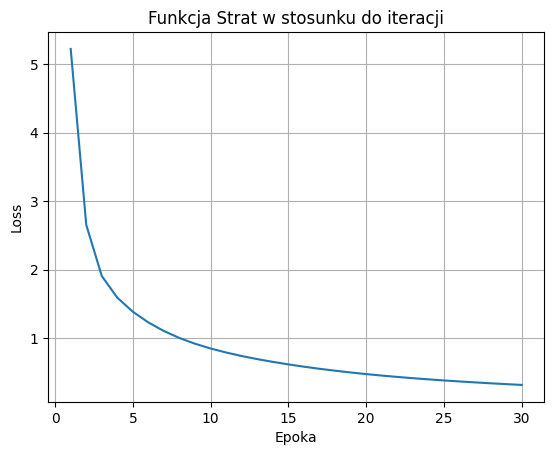

In [210]:

plt.plot(np.linspace(1,num_epoch,num_epoch),Avgloss)
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Funkcja Strat w stosunku do iteracji")
plt.grid(True)

In [218]:
def CrossTable(dataset,labels):
    #CZY JEST ZDROWY
    TP=0
    FN=0
    FP=0
    TN=0
    for i ,(batch,label) in enumerate(zip(dataset,labels)):
        batch=np.array(batch)
        label=np.array(label.astype(int))
        x=Lin1.forward(batch)
        x=fn_1.forward(x)
        x=Lin2.forward(x)
        x=fn_soft.forward(x)
        loss=Loss_fn.forward(x,label-1)
        predictions = np.argmax(x, axis=1)
        for i,(pred,true) in enumerate(zip(predictions,label-1)):
            if(pred==1):
                if(pred==true):
                    TP+=1
                else:
                    FP+=1
            else:
                if(true==1):
                    FN+=1
                else:
                    TN+=1
        accuracy = np.sum(predictions==(label-1))
    print("TP:",TP," FP:",FP," FN:",FN," TN:",TN)
    sensitivity=TP/(TP+FN)
    specificity=TN/(TN+FP)
    print("sensitivity:",sensitivity," specificity:",specificity)

In [219]:
CrossTable(dataset_test,test_labels)


TP: 12  FP: 73  FN: 12  TN: 216
sensitivity: 0.5  specificity: 0.7474048442906575
